In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('../reports/result_df.csv')

In [28]:
def add_benchmarks():
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 99.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 99.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend()

## Investigate model performance

**Note:** All the below are for an input length of **18** and an output length of **12**!

In [32]:
df1 = df[(df['input_len'] == 18) & (df['output_len'] == 12)]

### Impact of loss

Mean SMAPE

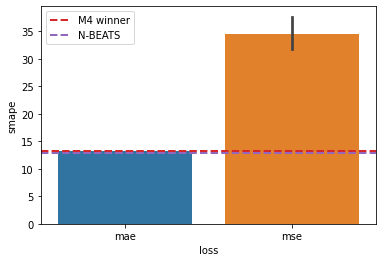

In [33]:
sns.barplot(x='loss', y='smape', data=df1)
add_benchmarks()

Median SMAPE

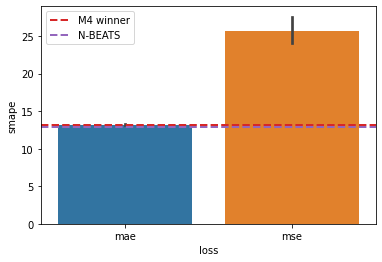

In [34]:
sns.barplot(x='loss', y='smape', data=df1, estimator=np.median)
add_benchmarks()

Minimum SMAPE

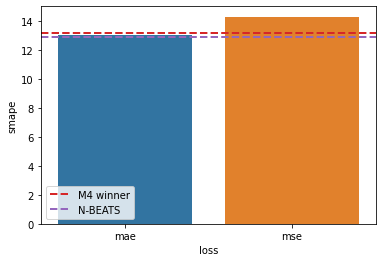

In [35]:
sns.barplot(x='loss', y='smape', data=df1, estimator=np.min, ci=None)
add_benchmarks()

### Exclude all MSE from analysis

In [36]:
df1 = df1[df1['loss'] != 'mse']

### Impact of bottleneck

Mean 

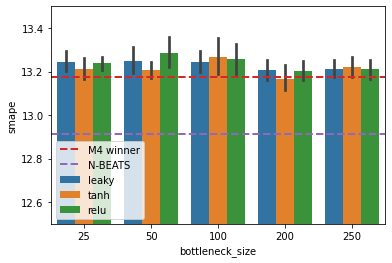

In [38]:
sns.barplot(x='bottleneck_size', y='smape', data=df1, hue='bottleneck_activation')
plt.ylim([12.5, 13.5])
add_benchmarks()

Median

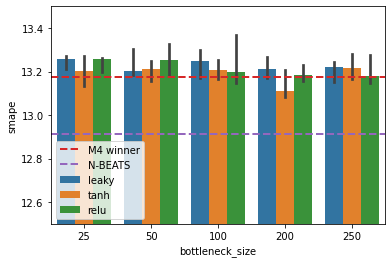

In [39]:
sns.barplot(x='bottleneck_size', y='smape', data=df1, hue='bottleneck_activation', estimator=np.median)
plt.ylim([12.5, 13.5])
add_benchmarks()

Minimum

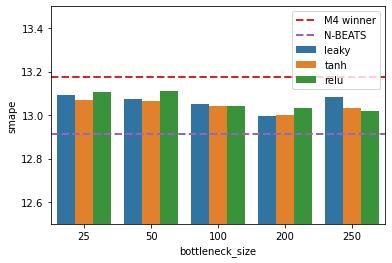

In [40]:
sns.barplot(x='bottleneck_size', y='smape', data=df1, hue='bottleneck_activation',
            estimator=np.min, ci=None)
plt.ylim([12.5, 13.5])
plt.xlim([-0.5, 4.5])

add_benchmarks()

### LSTM type

Mean SMAPE

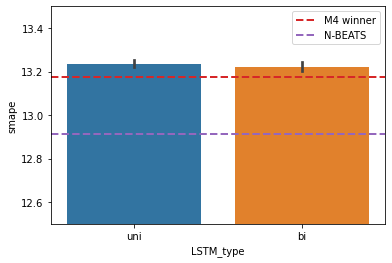

In [41]:
sns.barplot(x='LSTM_type', y='smape', data=df1)
plt.ylim([12.5, 13.5])

add_benchmarks()

Median SMAPE

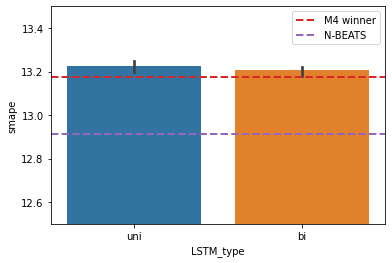

In [42]:
sns.barplot(x='LSTM_type', y='smape', data=df1, estimator=np.median)
plt.ylim([12.5, 13.5])

add_benchmarks()

Minimum SMAPE

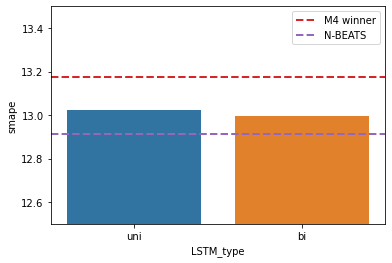

In [43]:
sns.barplot(x='LSTM_type', y='smape', data=df1, estimator=np.min, ci=None)
plt.ylim([12.5, 13.5])

add_benchmarks()

### Combination of all hyperparamters

In [44]:
grouped_df = pd.DataFrame({'smape': df1.groupby(['input_len', 'output_len', 'loss', 'bottleneck_size',
                           'bottleneck_activation', 'LSTM_type', 'num'])['smape'].mean()})
grouped_df['name'] = ['_'.join([str(y) for y in x][:-1]) for x in grouped_df.index]
grouped_df['num'] = grouped_df.index.get_level_values('num')
grouped_df.index = range(len(grouped_df))

Mean SMAPE

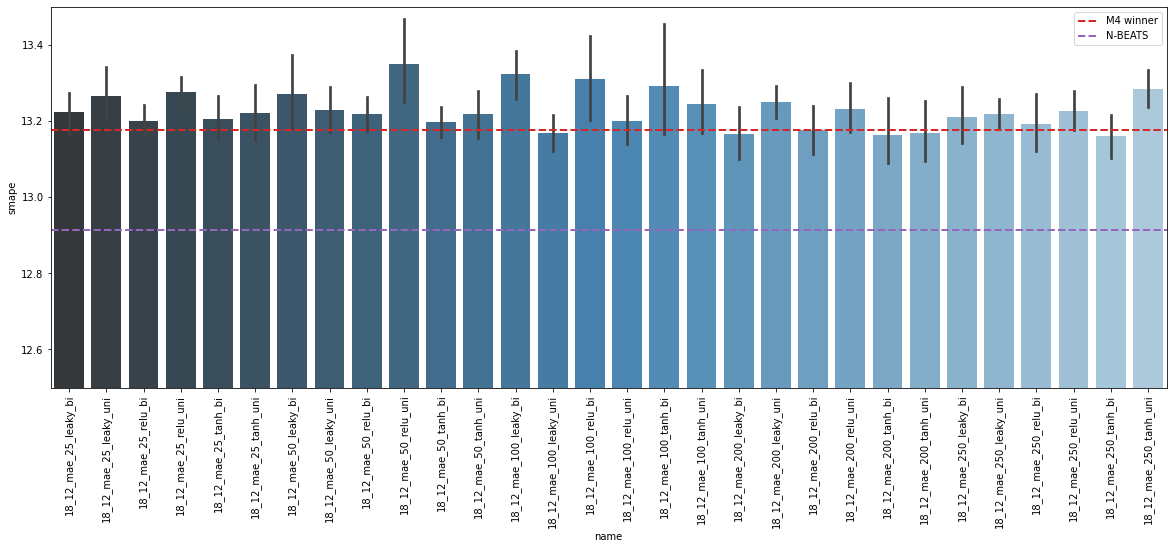

In [45]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=grouped_df, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

Median SMAPE

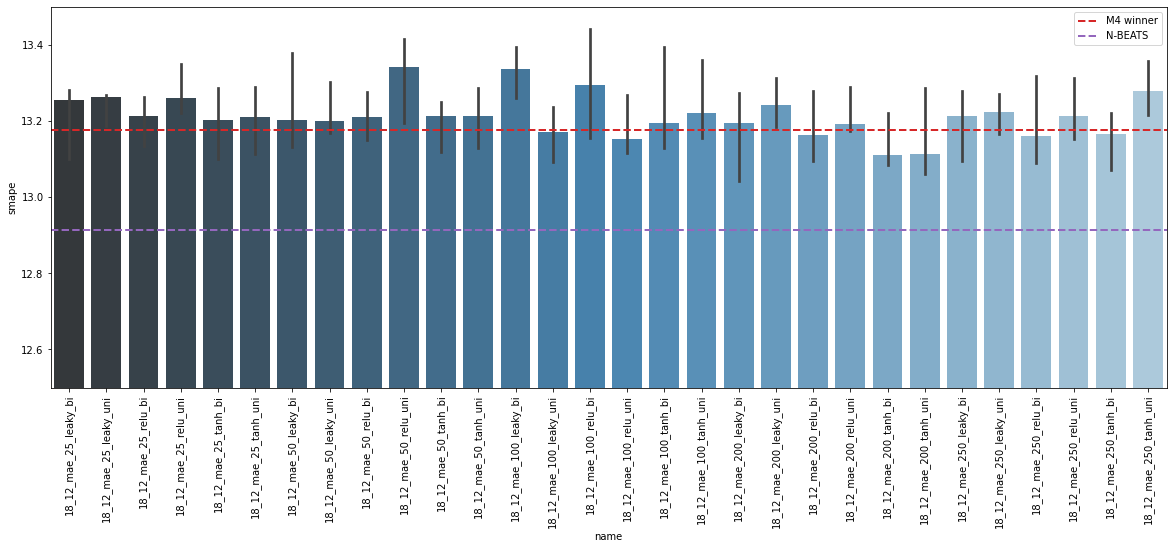

In [46]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=grouped_df, estimator=np.median, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

Minimum SMAPE

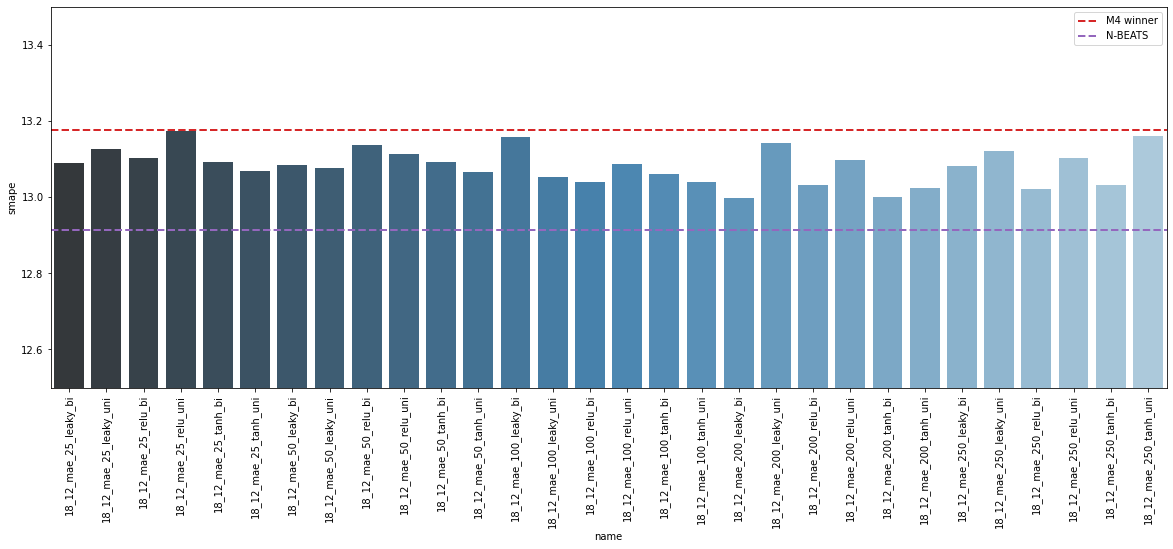

In [47]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=grouped_df, estimator=np.min, palette='Blues_d', ci=None)
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

### 5 best models (according to SMAPE)

In [48]:
df1.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,LSTM_type,num,smape,mase*
268,18,12,mae,200,leaky,bi,2,12.998446,2.648394
216,18,12,mae,200,tanh,bi,9,12.999459,2.641689
243,18,12,mae,200,leaky,bi,4,13.009272,2.642656
41,18,12,mae,250,relu,bi,3,13.020893,2.642055
218,18,12,mae,200,tanh,uni,4,13.023154,2.644728


## Conclusions:

- The most improtant hyperparameter is **by far** the loss function. MSE makes the models barely untrainable. The difference is so significant that there must be a reason behind this. One possible explanation is that MSE requires different training parameters to operate properly (e.g. smaller/higher learning rates). 
- Bottleneck hyperparameters have **little impact** to the training. Generally speaking **larger** bottleneck sizes prove to be better than smaller ones. **Note**: the best bottleneck sizes are so large that this cannot be strictly be considered an *Autoencoder*, as the bottleneck representation is very rich (its size is much larger than that of its input). I can't make any conclusion regarding the activation fucntion fo the bottleneck, other than *tanh* seems to be a bit more consistent than the other two (smaller mean/median values, less variation).
- **Bidirectional** LSTM layers are a bit supperior than unidirectional ones.

## Investigate input size

These aren't compared with the above as the hyperparameter investigation of the 12-point inputs is poorer than that of the 18-point ones (training was terminated prematurely).

To fairly compare the two we'll keep only the hyperparameters that are the same in both cases.

In [50]:
df2 = df[df.drop(['input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)]

Mean SMAPE

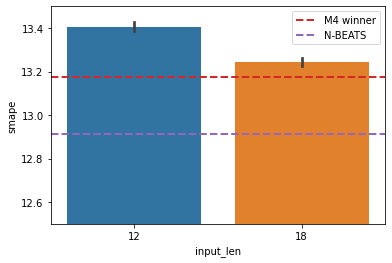

In [51]:
sns.barplot(x='input_len', y='smape', data=df2)
plt.ylim([12.5, 13.5])
add_benchmarks()

Median SMAPE

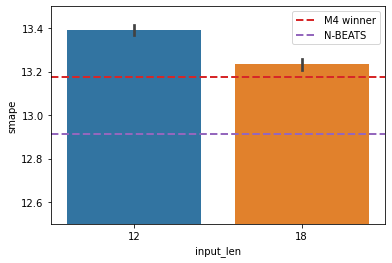

In [52]:
sns.barplot(x='input_len', y='smape', data=df2, estimator=np.median)
plt.ylim([12.5, 13.5])
add_benchmarks()

Minimum SMAPE

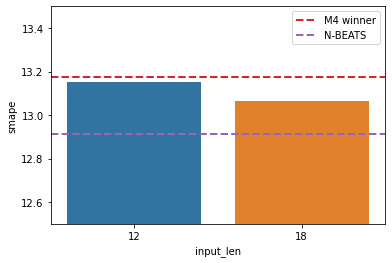

In [53]:
sns.barplot(x='input_len', y='smape', data=df2, estimator=np.min, ci=False)
plt.ylim([12.5, 13.5])
add_benchmarks()

### Conclusion

The larger input size **clearly helped** the model!

## Investigate output size

In [54]:
df3 = df[df.drop(['output_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)]

Mean SMAPE

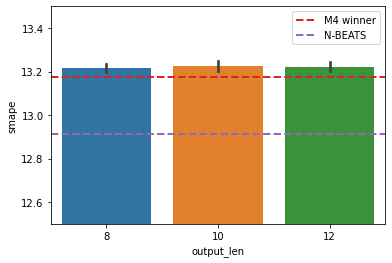

In [55]:
sns.barplot(x='output_len', y='smape', data=df3)
plt.ylim([12.5, 13.5])
add_benchmarks()

Median SMAPE

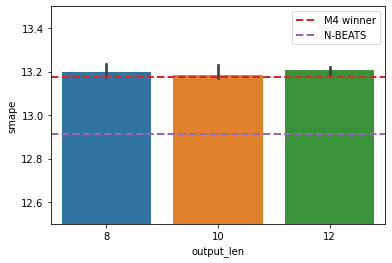

In [56]:
sns.barplot(x='output_len', y='smape', data=df3, estimator=np.median)
plt.ylim([12.5, 13.5])
add_benchmarks()

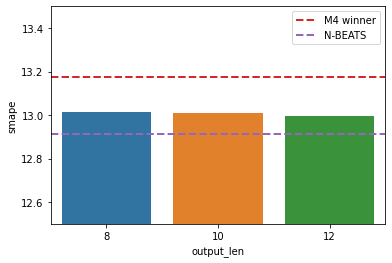

In [57]:
sns.barplot(x='output_len', y='smape', data=df3, estimator=np.min, ci=False)
plt.ylim([12.5, 13.5])
add_benchmarks()

### Conclusions

???